In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML models and tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [2]:
# Load Dataset
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Data Preprocessing
# Check missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Fill missing values 
df['Age'].fillna(df['Age'].median(), inplace=True) # repalce age with median as numerical column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # emabraked with most frequent value to handle missing categorical value

C:\Users\laiba\AppData\Local\Temp\ipykernel_9716\3175031494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True) # repalce age with median as numerical column


In [6]:
df['Cabin'].fillna('Unknown', inplace=True) 

In [8]:
df.isnull().sum() # no missing value now

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
# Convert categorical columns to numeric
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,2


In [30]:
# df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
# Features (X) and Target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardize features to scale down the features in one range and it is important for svm 
# The StandardScaler only works with numbers, not text.
# You had a string in your data like a name or ticket info.
# After dropping those columns and encoding categorical ones, scaling will work perfectly.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Initialize models
dt = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()
svm = SVC(kernel='rbf', random_state=42)

In [20]:
# train the models
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [22]:
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_svm = svm.predict(X_test)

--- Decision Tree ---
Accuracy: 0.765
Precision: 0.729
Recall: 0.689
F1 Score: 0.708

Confusion Matrix:
 [[86 19]
 [23 51]]


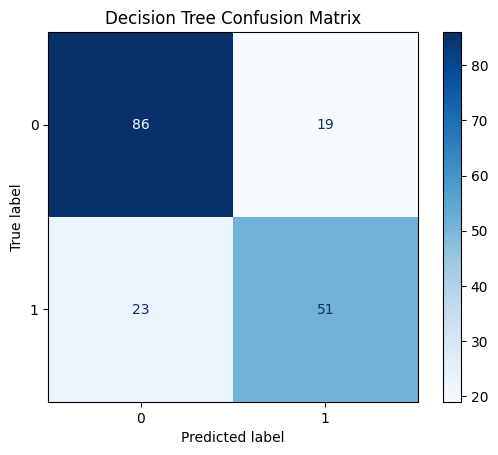



--- Naive Bayes ---
Accuracy: 0.777
Precision: 0.713
Recall: 0.77
F1 Score: 0.74

Confusion Matrix:
 [[82 23]
 [17 57]]


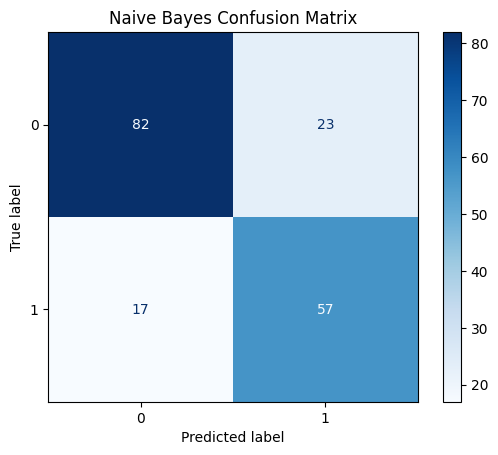



--- Support Vector Machine ---
Accuracy: 0.816
Precision: 0.806
Recall: 0.73
F1 Score: 0.766

Confusion Matrix:
 [[92 13]
 [20 54]]


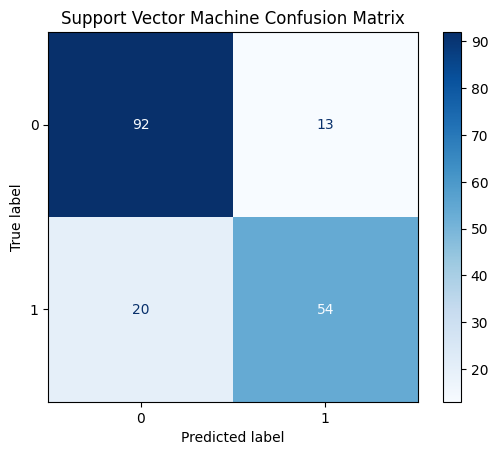

In [27]:
# calcualting all metrics to check performance of ecah model
def evaluate_model(y_true, y_pred, name):
    print(f"--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred), 3))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    
    # Ploting confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    print("\n")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")


Decision Tree: decent but slightly overfitted, missed some survivors.
Naive Bayes: balanced and handle noisy data well.
Support Vector Machine (SVM): best overall, stable results.

SVM performed best, Naive Bayes was consistent, and Decision Tree showed slight overfitting.

--- Bagging Ensemble ---
Accuracy: 0.821
Precision: 0.839
Recall: 0.703
F1 Score: 0.765

Confusion Matrix:
 [[95 10]
 [22 52]]


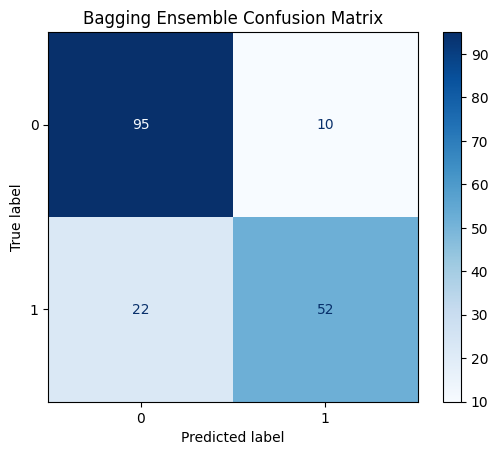



--- Boosting Ensemble ---
Accuracy: 0.799
Precision: 0.788
Recall: 0.703
F1 Score: 0.743

Confusion Matrix:
 [[91 14]
 [22 52]]


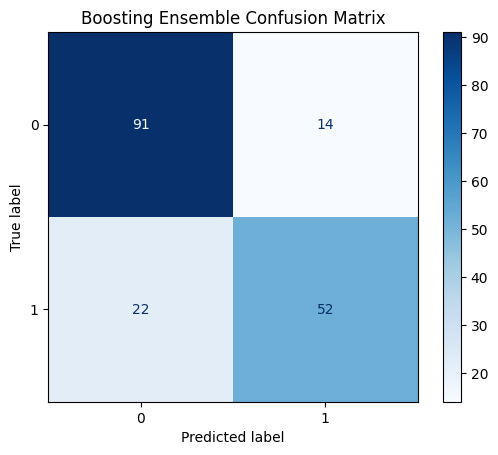

In [28]:
# Apply Ensemble Methods

# Bagging with Decision Tree
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

# Boosting 
boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)

# Evaluate Ensemble Models
evaluate_model(y_test, y_pred_bag, "Bagging Ensemble")
evaluate_model(y_test, y_pred_boost, "Boosting Ensemble")

Bagging Ensemble
Accuracy 82%, Precision 84%, Recall 70%, F1 76%  good overall results.
It reduced overfitting and handled noisy data better.

Boosting Ensemble
Accuracy 80%, Precision 79%, Recall 70%, F1 74%  slightly lower.
Boosting focused too much on noisy data, so performance drop.

Bagging performed better and was more stable on noisy data.